In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import flopy

config = {'font.family': 'Times New Roman',
          'font.size': 12,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'mathtext.fontset': 'stix',
         }
plt.rcParams.update(config)

results = np.load(f"./output/results.npy")
porosity = np.load(f"./output/results_porosity.npy")
K = np.load(f"./output/results_K.npy")

MIN3P_output_minerals = pd.read_csv("./input_data/MIN3P_output_minerals.csv")
MIN3P_output = pd.read_csv("./input_data/MIN3P_output_porosity-permeability.csv")

sim = flopy.mf6.MFSimulation.load(
    sim_ws="./simulation/",
    sim_name="model",
    verbosity_level=0
)

head = sim.get_model("gwf_model").output.head().get_alldata()

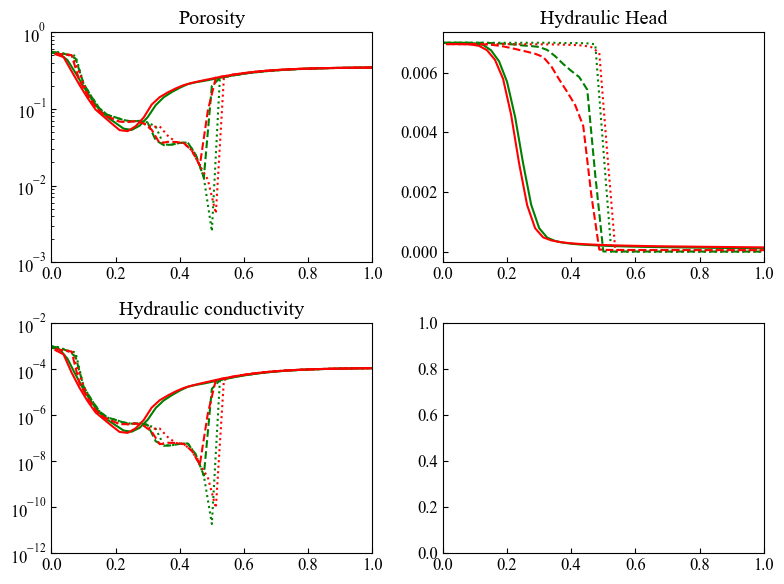

In [4]:
L = 2.0
dx = 0.025
n_mf6 = 80
n_min3p = 81

x_mf6 = np.linspace(dx/2, L - dx/2, n_mf6)
x_min3p = np.linspace(0, L, n_min3p)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

axes[0, 0].plot(x_min3p, MIN3P_output["Porosity 10years"], c="green", linestyle='-')
axes[0, 0].plot(x_min3p, MIN3P_output["Porosity 100years"], c="green", linestyle='--')
axes[0, 0].plot(x_min3p, MIN3P_output["Porosity 300years"], c="green", linestyle=':')
axes[0, 0].plot(x_mf6, porosity[1000*10], c="red", linestyle='-')
axes[0, 0].plot(x_mf6, porosity[1000*100], c="red", linestyle='--')
axes[0, 0].plot(x_mf6, porosity[1000*300], c="red", linestyle=':')
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1e-3, 1.0)
axes[0, 0].set_xlim(0.00, 1.0)
axes[0, 0].set_title("Porosity")

axes[0, 1].plot(x_min3p, MIN3P_output["Hydraulic head 10years"], c="green", linestyle='-')
axes[0, 1].plot(x_min3p, MIN3P_output["Hydraulic head 100years"], c="green", linestyle='--')
axes[0, 1].plot(x_min3p, MIN3P_output["Hydraulic head 300years"], c="green", linestyle=':')
axes[0, 1].plot(x_mf6, head[1000*10-1, 0, 0, :], c="red", linestyle='-')
axes[0, 1].plot(x_mf6, head[1000*100-1, 0, 0, :], c="red", linestyle='--')
axes[0, 1].plot(x_mf6, head[1000*300-1, 0, 0, :], c="red", linestyle=':')
axes[0, 1].set_title("Hydraulic Head")
axes[0, 1].set_xlim(0.00, 1.0)

axes[1, 0].plot(x_min3p, MIN3P_output["Hydraulic conductivity 10years"], c="green", linestyle='-')
axes[1, 0].plot(x_min3p, MIN3P_output["Hydraulic conductivity 100years"], c="green", linestyle='--')
axes[1, 0].plot(x_min3p, MIN3P_output["Hydraulic conductivity 300years"], c="green", linestyle=':')
axes[1, 0].plot(x_mf6, K[1000*10]/86400, c="red", linestyle='-')
axes[1, 0].plot(x_mf6, K[1000*100]/86400, c="red", linestyle='--')
axes[1, 0].plot(x_mf6, K[1000*300]/86400, c="red", linestyle=':')
axes[1, 0].set_title("Hydraulic conductivity")
axes[1, 0].set_yscale('log')
axes[1, 0].set_ylim(1e-12, 1e-2)
axes[1, 0].set_xlim(0.00, 1.0)

plt.tight_layout()
plt.show()

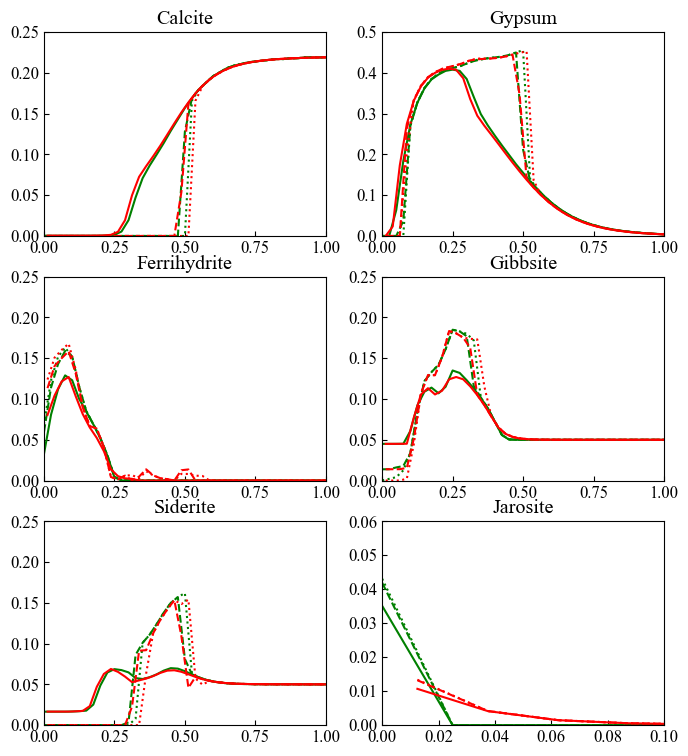

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(8, 9))

axes[0, 0].plot(x_min3p, MIN3P_output_minerals["Calcite 10years"],  c="green", linestyle='-')
axes[0, 0].plot(x_min3p, MIN3P_output_minerals["Calcite 100years"], c="green", linestyle='--')
axes[0, 0].plot(x_min3p, MIN3P_output_minerals["Calcite 300years"], c="green", linestyle=':')
axes[0, 0].plot(x_mf6, results[1000*10,  0, :] / 2.71 * 100.09 / 1000, c="red", linestyle='-')
axes[0, 0].plot(x_mf6, results[1000*100, 0, :] / 2.71 * 100.09 / 1000, c="red", linestyle='--')
axes[0, 0].plot(x_mf6, results[1000*300, 0, :] / 2.71 * 100.09 / 1000, c="red", linestyle=':')
axes[0, 0].set_title("Calcite")
axes[0, 0].set_xlim(0.00, 1.0)
axes[0, 0].set_ylim(0.0, 0.25)
_ = axes[0, 0].set_xticks(np.linspace(0,1.0,5))

axes[0, 1].plot(x_min3p, MIN3P_output_minerals["Gypsum 10years"],  c="green", linestyle='-')
axes[0, 1].plot(x_min3p, MIN3P_output_minerals["Gypsum 100years"], c="green", linestyle='--')
axes[0, 1].plot(x_min3p, MIN3P_output_minerals["Gypsum 300years"], c="green", linestyle=':')
axes[0, 1].plot(x_mf6, results[1000*10,  2, :] / 2.32 * 172.17 / 1000, c="red", linestyle='-')
axes[0, 1].plot(x_mf6, results[1000*100, 2, :] / 2.32 * 172.17 / 1000, c="red", linestyle='--')
axes[0, 1].plot(x_mf6, results[1000*300, 2, :] / 2.32 * 172.17 / 1000, c="red", linestyle=':')
axes[0, 1].set_title("Gypsum")
axes[0, 1].set_xlim(0.00, 1.0)
axes[0, 1].set_ylim(0.0, 0.5)
_ = axes[0, 1].set_xticks(np.linspace(0,1.0,5))

axes[1, 0].plot(x_min3p, MIN3P_output_minerals["Ferrihydrite 10years"],  c="green", linestyle='-')
axes[1, 0].plot(x_min3p, MIN3P_output_minerals["Ferrihydrite 100years"], c="green", linestyle='--')
axes[1, 0].plot(x_min3p, MIN3P_output_minerals["Ferrihydrite 300years"], c="green", linestyle=':')
axes[1, 0].plot(x_mf6, results[1000*10,  4, :] / 4.37 * 104.87 / 1000, c="red", linestyle='-')
axes[1, 0].plot(x_mf6, results[1000*100, 4, :] / 4.37 * 104.87 / 1000, c="red", linestyle='--')
axes[1, 0].plot(x_mf6, results[1000*300, 4, :] / 4.37 * 104.87 / 1000, c="red", linestyle=':')
axes[1, 0].set_title("Ferrihydrite")
axes[1, 0].set_xlim(0.00, 1.0)
axes[1, 0].set_ylim(0.0, 0.25)
_ = axes[1, 0].set_xticks(np.linspace(0, 1.0, 5))

axes[2, 0].plot(x_min3p, MIN3P_output_minerals["Siderite 10years"],  c="green", linestyle='-')
axes[2, 0].plot(x_min3p, MIN3P_output_minerals["Siderite 100years"], c="green", linestyle='--')
axes[2, 0].plot(x_min3p, MIN3P_output_minerals["Siderite 300years"], c="green", linestyle=':')
axes[2, 0].plot(x_mf6, results[1000*10,  10, :] / 3.96 * 115.86 / 1000, c="red", linestyle='-')
axes[2, 0].plot(x_mf6, results[1000*100, 10, :] / 3.96 * 115.86 / 1000, c="red", linestyle='--')
axes[2, 0].plot(x_mf6, results[1000*300, 10, :] / 3.96 * 115.86 / 1000, c="red", linestyle=':')
axes[2, 0].set_title("Siderite")
axes[2, 0].set_xlim(0.00, 1.0)
axes[2, 0].set_ylim(0.0, 0.25)
_ = axes[2, 0].set_xticks(np.linspace(0,1.0,5))

axes[1, 1].plot(x_min3p, MIN3P_output_minerals["Gibbsite 10years"],  c="green", linestyle='-')
axes[1, 1].plot(x_min3p, MIN3P_output_minerals["Gibbsite 100years"], c="green", linestyle='--')
axes[1, 1].plot(x_min3p, MIN3P_output_minerals["Gibbsite 300years"], c="green", linestyle=':')
axes[1, 1].plot(x_mf6, results[1000*10,  8, :] / 2.35 * 78.00 / 1000, c="red", linestyle='-')
axes[1, 1].plot(x_mf6, results[1000*100, 8, :] / 2.35 * 78.00 / 1000, c="red", linestyle='--')
axes[1, 1].plot(x_mf6, results[1000*300, 8, :] / 2.35 * 78.00 / 1000, c="red", linestyle=':')

axes[1, 1].set_title("Gibbsite")
axes[1, 1].set_xlim(0.00, 1.0)
axes[1, 1].set_ylim(0.0, 0.25)
_ = axes[1, 1].set_xticks(np.linspace(0,1.0,5))

axes[2, 1].plot(x_min3p, MIN3P_output_minerals["Jarosite 10years"],  c="green", linestyle='-')
axes[2, 1].plot(x_min3p, MIN3P_output_minerals["Jarosite 100years"], c="green", linestyle='--')
axes[2, 1].plot(x_min3p, MIN3P_output_minerals["Jarosite 300years"], c="green", linestyle=':')
axes[2, 1].plot(x_mf6, results[1000*10,  6, :] / 3.20 * 494.81 / 1000, c="red", linestyle='-')
axes[2, 1].plot(x_mf6, results[1000*100, 6, :] / 3.20 * 494.81 / 1000, c="red", linestyle='--')
axes[2, 1].plot(x_mf6, results[1000*300, 6, :] / 3.20 * 494.81 / 1000, c="red", linestyle=':')
axes[2, 1].set_title("Jarosite")
axes[2, 1].set_xlim(0.00, 0.1)
axes[2, 1].set_ylim(0.0, 0.06)
_ = axes[2, 1].set_xticks(np.linspace(0,0.1,6))